In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
pip install keras.preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 583.4 kB/s eta 0:00:00


In [ ]:
# Tensorflow Libraries
from tensorflow.keras import layers, models
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model

In [ ]:
# System libraries
from pathlib import Path
import os

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Import helper functions

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2024-07-14 05:13:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-14 05:13:57 (26.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = "/content/drive/MyDrive/Cabai"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
classes = ["fresh","dry", "medium"]

segar_train_path = os.path.join(train_dir, 'fresh')
kering_train_path = os.path.join(train_dir, 'dry')
sedang_train_path = os.path.join(train_dir, 'medium')

segar_val_path = os.path.join(val_dir, 'fresh')
kering_val_path = os.path.join(val_dir, 'dry')
sedang_val_path = os.path.join(val_dir, 'medium')

len_segar_train = len(os.listdir(segar_train_path))
len_kering_train = len(os.listdir(kering_train_path))
len_sedang_train = len(os.listdir(sedang_train_path))

len_segar_val = len(os.listdir(segar_val_path))
len_kering_val = len(os.listdir(kering_val_path))
len_sedang_val = len(os.listdir(sedang_val_path))

print("Panjang train:", str(len_segar_train + len_kering_train + len_sedang_train))
print("Panjang validation:", str(len_segar_val + len_kering_val + len_sedang_val))

print('''\n==== Jumlah data train ====
Panjang data train fresh: {}
Panjang data train dry: {}
Panjang data train medium: {}
'''.format(len_segar_train, len_kering_train, len_sedang_train))

print('''\n==== Jumlah data validation ====
Panjang data validation fresh: {}
Panjang data validation dry: {}
Panjang data validation medium: {}
'''.format(len_segar_val, len_kering_val, len_sedang_val))

Panjang train: 600
Panjang validation: 150

==== Jumlah data train ====
Panjang data train fresh: 200
Panjang data train dry: 200
Panjang data train medium: 200


==== Jumlah data validation ====
Panjang data validation fresh: 50
Panjang data validation dry: 50
Panjang data validation medium: 50



In [ ]:
train_segar_fnames = os.listdir(segar_train_path)
train_kering_fnames = os.listdir(kering_train_path)

print(train_segar_fnames[:10])
print(train_kering_fnames[:10])


['IMG_20230831_145157.jpg', 'IMG_20230831_145147.jpg', 'IMG_20230831_145204.jpg', 'IMG_20230831_145210.jpg', 'IMG_20230831_145231.jpg', 'IMG_20230831_145225.jpg', 'IMG_20230831_145248.jpg', 'IMG_20230831_145241.jpg', 'IMG_20230831_145235.jpg', 'IMG_20230831_145251.jpg']
['IMG_1327.jpg', 'IMG_1330.jpg', 'IMG_1331.jpg', 'IMG_1329.jpg', 'IMG_1328.jpg', 'IMG_1336.jpg', 'IMG_1332.jpg', 'IMG_1333.jpg', 'IMG_1334.jpg', 'IMG_1335.jpg']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 10
ncols = 8

pic_index = 0

['/content/drive/MyDrive/Cabai/train/fresh/IMG_20230831_145157.jpg', '/content/drive/MyDrive/Cabai/train/fresh/IMG_20230831_145147.jpg', '/content/drive/MyDrive/Cabai/train/fresh/IMG_20230831_145204.jpg', '/content/drive/MyDrive/Cabai/train/fresh/IMG_20230831_145210.jpg', '/content/drive/MyDrive/Cabai/train/fresh/IMG_20230831_145231.jpg', '/content/drive/MyDrive/Cabai/train/fresh/IMG_20230831_145225.jpg', '/content/drive/MyDrive/Cabai/train/fresh/IMG_20230831_145248.jpg', '/content/drive/MyDrive/Cabai/train/fresh/IMG_20230831_145241.jpg']


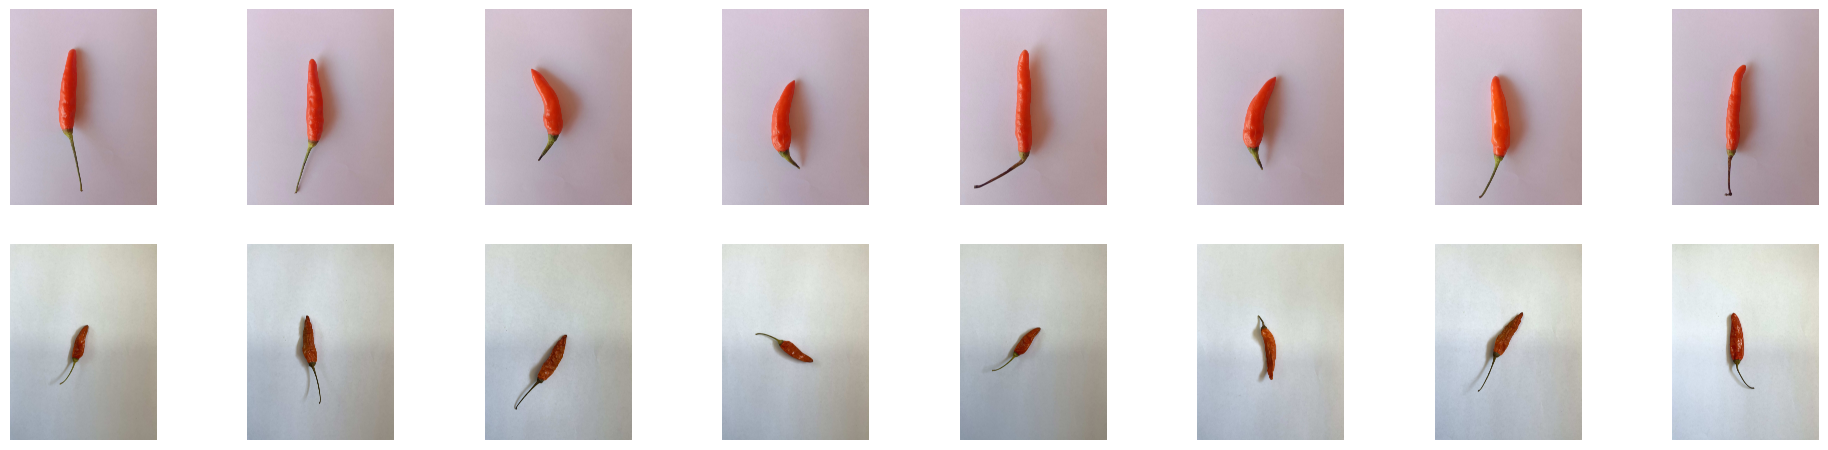

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_segar_pix = [os.path.join(segar_train_path, fname)
                  for fname in train_segar_fnames[ pic_index-8:pic_index]
                 ]
next_kering_pix = [os.path.join(kering_train_path, fname)
                  for fname in train_kering_fnames[ pic_index-8:pic_index]
                 ]
print(next_segar_pix)

for i, img_path in enumerate(next_segar_pix + next_kering_pix):
  sp =  plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D

In [ ]:
# Definisikan ukuran gambar
image_size = [224, 224]

# Muat arsitektur MobileNetV2 dengan bobot dari ImageNet, tanpa lapisan fully connected di bagian atas (include_top=False)
mobilenetv2 = MobileNetV2(input_shape=image_size + [3], weights='imagenet', include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Lakukan flattening pada output dari MobileNetV2
x = Flatten()(mobilenetv2.output)

# Tambahkan lapisan dense dengan 512 unit dan aktivasi ReLU
x = Dense(512, activation='relu')(x)

# Tambahkan lapisan output dengan 10 unit dan aktivasi softmax untuk klasifikasi 10 kelas
prediction = Dense(10, activation='softmax')(x)

In [ ]:
# Bentuk model dengan input dari MobileNetV2 dan output dari lapisan prediksi
model = Model(inputs=mobilenetv2.input, outputs=prediction)

# Tampilkan ringkasan arsitektur model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    rotation_range = 30,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest',
)
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle=True,
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False,
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
)



Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools

In [ ]:
image_list = []
label_list = []

for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_path):
        image_list.append(os.path.join(class_path, image_name))
        label_list.append(class_name)

image_df = pd.DataFrame({'Filepath': image_list, 'Label': label_list})

In [ ]:
# Variable definitions
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
num_classes = len(image_df['Label'].unique())
k_folds = 5
epochs = 50  # Anda dapat mengubah jumlah epochs sesuai kebutuhan

# Stratified K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_no = 1
results = []

# Data Generators
data_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

In [ ]:
# Menggabungkan history dari setiap fold
all_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': []
}

for train_idx, val_idx in kfold.split(image_df['Filepath'], image_df['Label']):
    train_df = image_df.iloc[train_idx]
    val_df = image_df.iloc[val_idx]

    train_images = data_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=IMAGE_SIZE,
        color_mode='rgb',
        class_mode='categorical',
        batch_size=BATCH_SIZE,
        shuffle=True,
        seed=42
    )

    val_images = data_generator.flow_from_dataframe(
        dataframe=val_df,
        x_col='Filepath',
        y_col='Label',
        target_size=IMAGE_SIZE,
        color_mode='rgb',
        class_mode='categorical',
        batch_size=BATCH_SIZE,
        shuffle=True,
        seed=42
    )

    # Model setup
    pretrained_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    pretrained_model.trainable = False
    inputs = pretrained_model.input

    # Flatten the output layer from the pretrained model
    x = Flatten()(pretrained_model.output)

    # Add fully connected layers
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Add output layer
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    checkpoint_path = f"herbal_leaf_classification_model_checkpoint_fold_{fold_no}"
    checkpoint_callback = ModelCheckpoint(
        checkpoint_path,
        save_weights_only=True,
        monitor="val_accuracy",
        save_best_only=True
    )
    model_checkpoint = ModelCheckpoint(
        f'best_model_fold_{fold_no}.h5',
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1
    )

    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    print(f"Training fold {fold_no} ...")
    history_kfold = model.fit(
        train_images,
        steps_per_epoch=len(train_images),
        validation_data=val_images,
        validation_steps=len(val_images),
        epochs=epochs,
        callbacks=[early_stopping, checkpoint_callback, model_checkpoint]
    )

    # Simpan history dari setiap fold
    all_history['accuracy'].extend(history_kfold.history['accuracy'])
    all_history['val_accuracy'].extend(history_kfold.history['val_accuracy'])
    all_history['loss'].extend(history_kfold.history['loss'])
    all_history['val_loss'].extend(history_kfold.history['val_loss'])

    # Load the best model for evaluation
    model.load_weights(f'best_model_fold_{fold_no}.h5')

    # Model Evaluation on validation data
    val_results = model.evaluate(val_images, verbose=0)
    print(f"Fold {fold_no} - Validation Loss: {val_results[0]} - Validation Accuracy: {val_results[1] * 100}%")
    results.append(val_results)

    # Get true labels and predictions for the validation set
    val_labels = val_images.classes
    val_preds = model.predict(val_images, verbose=0)
    val_pred_labels = np.argmax(val_preds, axis=1)

    fold_no += 1

# Average results
avg_loss = np.mean([r[0] for r in results])
avg_accuracy = np.mean([r[1] for r in results])
print(f"Average Validation Loss: {avg_loss}")
print(f"Average Validation Accuracy: {avg_accuracy * 100}%")

Found 480 validated image filenames belonging to 3 classes.
Found 120 validated image filenames belonging to 3 classes.
Training fold 1 ...
Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 1.8704 - accuracy: 0.4354
Epoch 1: val_loss improved from inf to 0.77791, saving model to best_model_fold_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 156s 11s/step - loss: 1.8704 - accuracy: 0.4354 - val_loss: 0.7779 - val_accuracy: 0.6833
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 1.1300 - accuracy: 0.5667
Epoch 2: val_loss improved from 0.77791 to 0.49463, saving model to best_model_fold_1.h5
15/15 [==============================] - 78s 5s/step - loss: 1.1300 - accuracy: 0.5667 - val_loss: 0.4946 - val_accuracy: 0.8250
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.8066 - accuracy: 0.6625
Epoch 3: val_loss improved from 0.49463 to 0.40851, saving model to best_model_fold_1.h5
15/15 [==============================] - 78s 5s/step - loss: 0.8066 - accuracy: 0.6625 - val_loss: 0.4085 - val_accuracy: 0.8500
Epoch 4/50
15/15 [==============================] - ETA: 0s - loss: 0.5932 - accuracy: 0.7750
Epoch 4: val_loss improved from 0.40851 to 0.31829, saving model to best_model_fold_1.h5
15/15 [==============================] - 90s 6s/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 77s 5s/step - loss: 1.8025 - accuracy: 0.4250 - val_loss: 0.7893 - val_accuracy: 0.6417
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 1.1849 - accuracy: 0.4958
Epoch 2: val_loss improved from 0.78932 to 0.55072, saving model to best_model_fold_2.h5
15/15 [==============================] - 74s 5s/step - loss: 1.1849 - accuracy: 0.4958 - val_loss: 0.5507 - val_accuracy: 0.8250
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.7943 - accuracy: 0.6375
Epoch 3: val_loss improved from 0.55072 to 0.43257, saving model to best_model_fold_2.h5
15/15 [==============================] - 71s 5s/step - loss: 0.7943 - accuracy: 0.6375 - val_loss: 0.4326 - val_accuracy: 0.8667
Epoch 4/50
15/15 [==============================] - ETA: 0s - loss: 0.6170 - accuracy: 0.7563
Epoch 4: val_loss improved from 0.43257 to 0.33302, saving model to best_model_fold_2.h5
15/15 [==============================] - 71s 5s/step - loss: 0.6

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 76s 5s/step - loss: 1.7612 - accuracy: 0.4646 - val_loss: 0.6698 - val_accuracy: 0.7417
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 1.1805 - accuracy: 0.5729
Epoch 2: val_loss improved from 0.66983 to 0.38225, saving model to best_model_fold_3.h5
15/15 [==============================] - 66s 4s/step - loss: 1.1805 - accuracy: 0.5729 - val_loss: 0.3823 - val_accuracy: 0.8667
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.8017 - accuracy: 0.6625
Epoch 3: val_loss improved from 0.38225 to 0.28632, saving model to best_model_fold_3.h5
15/15 [==============================] - 67s 5s/step - loss: 0.8017 - accuracy: 0.6625 - val_loss: 0.2863 - val_accuracy: 0.9083
Epoch 4/50
15/15 [==============================] - ETA: 0s - loss: 0.5813 - accuracy: 0.7771
Epoch 4: val_loss improved from 0.28632 to 0.24462, saving model to best_model_fold_3.h5
15/15 [==============================] - 69s 5s/step - loss: 0.5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 76s 5s/step - loss: 1.9141 - accuracy: 0.3792 - val_loss: 0.7368 - val_accuracy: 0.7167
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 1.0029 - accuracy: 0.5938
Epoch 2: val_loss improved from 0.73681 to 0.55518, saving model to best_model_fold_4.h5
15/15 [==============================] - 64s 4s/step - loss: 1.0029 - accuracy: 0.5938 - val_loss: 0.5552 - val_accuracy: 0.8083
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.7017 - accuracy: 0.7021
Epoch 3: val_loss improved from 0.55518 to 0.43828, saving model to best_model_fold_4.h5
15/15 [==============================] - 70s 5s/step - loss: 0.7017 - accuracy: 0.7021 - val_loss: 0.4383 - val_accuracy: 0.8500
Epoch 4/50
15/15 [==============================] - ETA: 0s - loss: 0.5248 - accuracy: 0.7958
Epoch 4: val_loss improved from 0.43828 to 0.37628, saving model to best_model_fold_4.h5
15/15 [==============================] - 66s 4s/step - loss: 0.5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 76s 5s/step - loss: 1.7372 - accuracy: 0.4292 - val_loss: 0.6117 - val_accuracy: 0.7083
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 1.0724 - accuracy: 0.5896
Epoch 2: val_loss improved from 0.61167 to 0.37960, saving model to best_model_fold_5.h5
15/15 [==============================] - 65s 4s/step - loss: 1.0724 - accuracy: 0.5896 - val_loss: 0.3796 - val_accuracy: 0.8750
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 0.7359 - accuracy: 0.6958
Epoch 3: val_loss improved from 0.37960 to 0.28351, saving model to best_model_fold_5.h5
15/15 [==============================] - 63s 4s/step - loss: 0.7359 - accuracy: 0.6958 - val_loss: 0.2835 - val_accuracy: 0.9167
Epoch 4/50
15/15 [==============================] - ETA: 0s - loss: 0.5637 - accuracy: 0.7521
Epoch 4: val_loss improved from 0.28351 to 0.21944, saving model to best_model_fold_5.h5
15/15 [==============================] - 85s 6s/step - loss: 0.5

In [ ]:
# Evaluasi data testing menggunakan model terbaik dari cross-validation
# Membuat DataFrame untuk data testing
test_image_list = []
test_label_list = []

for class_name in classes:
    class_path = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_path):
        test_image_list.append(os.path.join(class_path, image_name))
        test_label_list.append(class_name)

test_df = pd.DataFrame({'Filepath': test_image_list, 'Label': test_label_list})

test_images = data_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Evaluasi model pada data testing
test_results = model.evaluate(test_images, verbose=0)
print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1] * 100}%")

NameError: name 'test_dir' is not defined

Length of accuracy: 200
Length of validation accuracy: 200
Length of loss: 200
Length of validation loss: 200


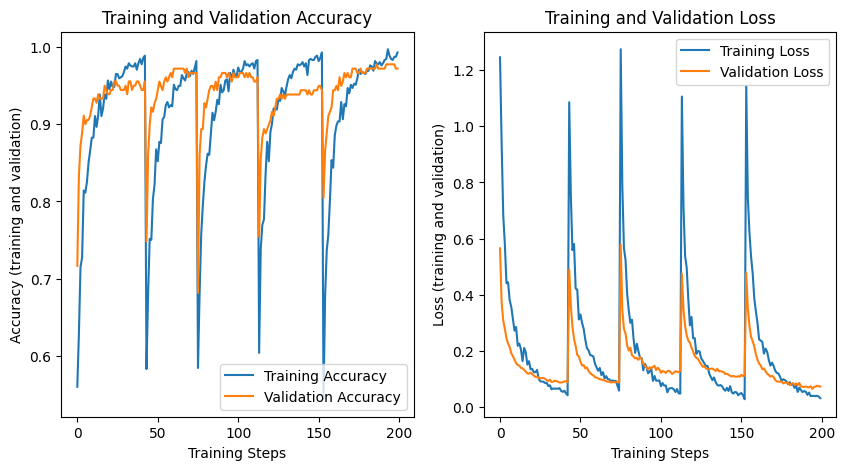

In [ ]:
# Plotting the aggregated history
acc = all_history['accuracy']
val_acc = all_history['val_accuracy']
loss = all_history['loss']
val_loss = all_history['val_loss']

# Print lengths to check alignment
print("Length of accuracy:", len(acc))
print("Length of validation accuracy:", len(val_acc))
print("Length of loss:", len(loss))
print("Length of validation loss:", len(val_loss))

# Set epochs to the length of one of these arrays if they are the same
epochs = len(acc)  # Change this to match your data

epochs_range = range(epochs)

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")

plt.show()

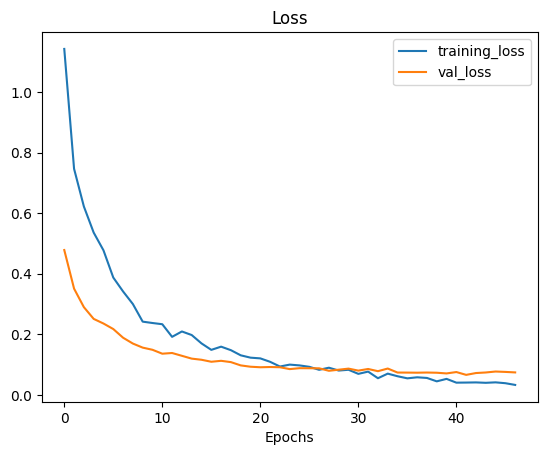

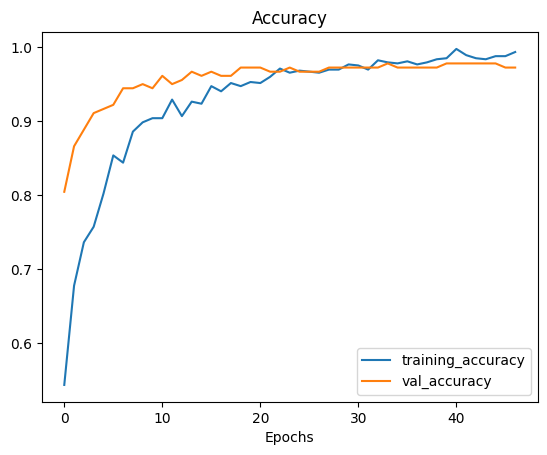

In [ ]:
plot_loss_curves(history_kfold)

4/4 [==============================] - 18s 4s/step


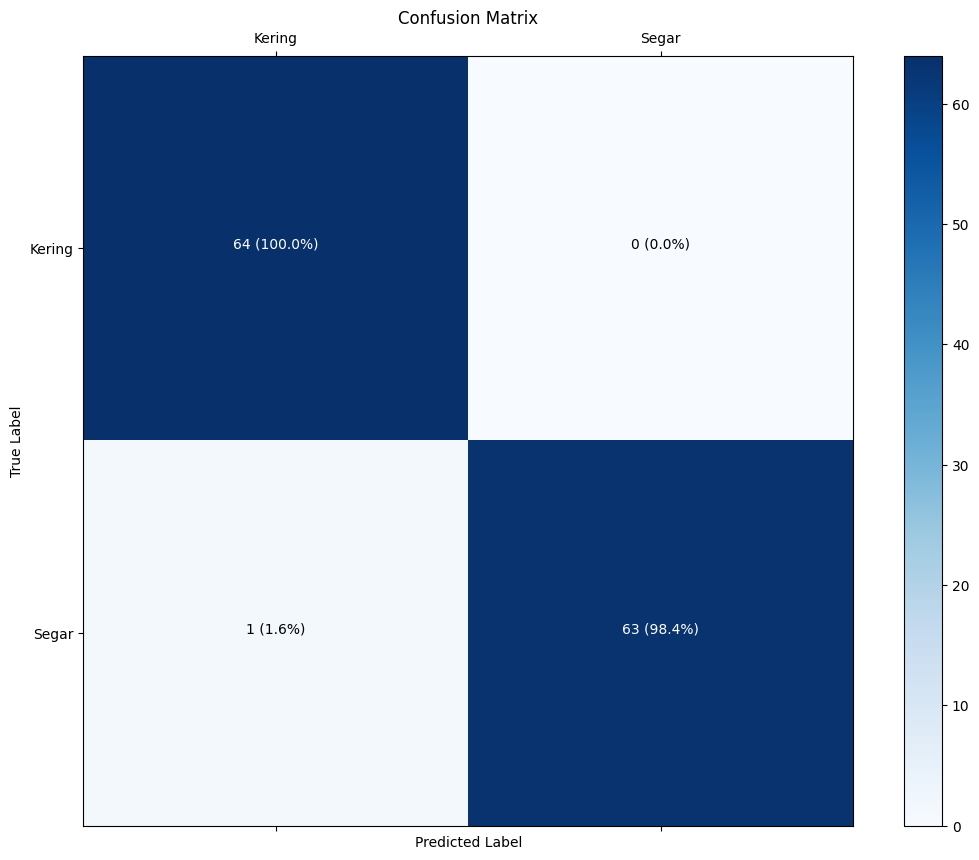

In [ ]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(13, 10), text_size=10, norm=False, savefig=False):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    threshold = (cm.max() + cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black",
                     size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
                     horizontalalignment="center",
                     color="white" if cm[i, j] > threshold else "black",
                     size=text_size)
    if savefig:
        fig.savefig("confusion_matrix.png")

# Dapatkan prediksi dari model pada data pengujian
test_images.reset()
predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)

# Dapatkan nilai sebenarnya dari data pengujian
y_true = test_images.classes

# Dapatkan label kelas
labels = list(test_images.class_indices.keys())

# Buat confusion matrix
make_confusion_matrix(y_true, y_pred, classes=labels, figsize=(13, 10), text_size=10, norm=True, savefig=True)
plt.show()

4/4 [==============================] - 17s 4s/step


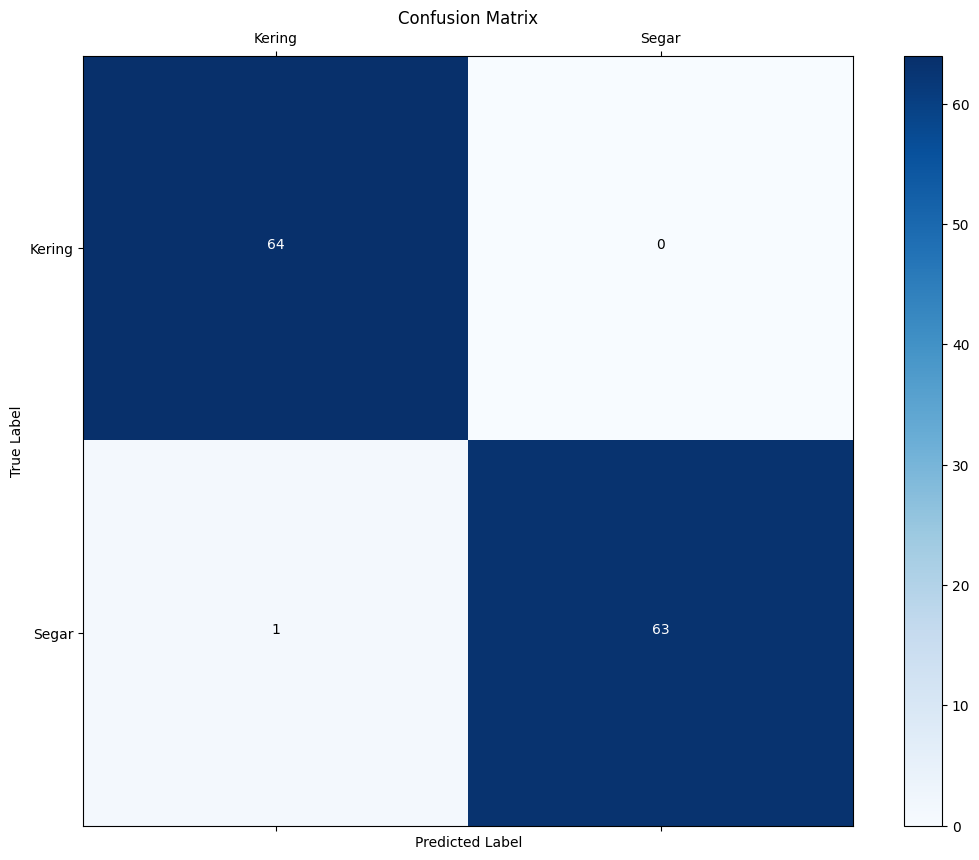

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(13, 10), text_size=10, norm=False, savefig=False):
    # Hitung confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Jika norm True, normalkan confusion matrix
    if norm:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    n_classes = cm.shape[0]

    # Buat plot
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Tetapkan label kelas
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Atur sumbu
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Tentukan threshold untuk warna teks
    threshold = (cm.max() + cm.min()) / 2.

    # Plot teks di setiap sel
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]}",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

    # Simpan gambar jika diperlukan
    if savefig:
        fig.savefig("confusion_matrix.png")

# Contoh penggunaan
# Dapatkan prediksi dari model pada data pengujian
test_images.reset()
predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)

# Dapatkan nilai sebenarnya dari data pengujian
y_true = test_images.classes

# Dapatkan label kelas
labels = list(test_images.class_indices.keys())

# Buat confusion matrix tanpa normalisasi
make_confusion_matrix(y_true, y_pred, classes=labels, figsize=(13, 10), text_size=10, norm=False, savefig=True)
plt.show()


In [ ]:
# Mendapatkan prediksi pada data testing
test_preds = model.predict(test_images, verbose=0)
test_pred_labels = np.argmax(test_preds, axis=1)

# Mendapatkan label sebenarnya
test_labels = test_images.classes

# Classification Report
print("Classification Report pada data testing")
print(classification_report(test_labels, test_pred_labels, target_names=list(test_images.class_indices.keys())))

Classification Report pada data testing
              precision    recall  f1-score   support

      Kering       0.98      1.00      0.99        64
       Segar       1.00      0.98      0.99        64

    accuracy                           0.99       128
   macro avg       0.99      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



1/1 [==============================] - 0s 71ms/step
Segar


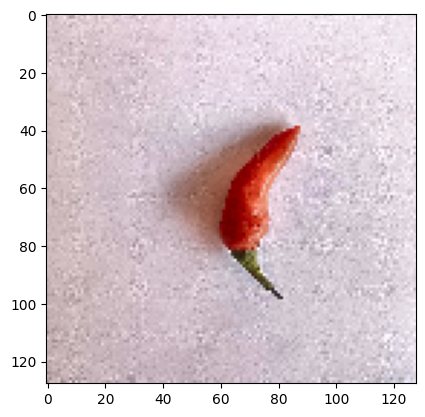

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import matplotlib.pyplot as plt  # Import plt for imshow
# from google.colab import files

# Replace 'C:/path/to/training/images/' with the actual path to your training images directory
train_dir = '/content/drive/MyDrive/modelsplit/'

# Path to the test image
path_test = '/content/drive/MyDrive/modelsplit/train/Segar/IMG_20230831_145204_flipped.jpg'

# Load and preprocess the image
img = image.load_img(path_test, target_size=(128,128))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Predict the class
images = np.vstack([x])
classes = model.predict(images, batch_size=10)

# Class names (assuming they are ordered the same as the training data)
class_list = os.listdir(train_dir)

if classes[0][0]:
    prediction="Segar"
elif classes[0][1]:
    prediction="Kering"
else:
    prediction="[Undefined]"
print(prediction)

In [ ]:
saved_model_dir = '/content/drive/MyDrive/Colab Notebooks'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('cabai.tflite', 'wb') as f:
  f.write(tflite_model)